Carga de Archivo que contiene los precios de energia en función del tiempo. 

In [8]:
import pandas as pd

df = pd.read_csv("C:/Users/omar_/Documents/ITESO/5to Semestre/Programación Avanzada/Proyecto/PreciosEnergia.csv", engine='python')
print(df.head())

        Fecha  Hora Zona de Carga  Precio Zonal  ($/MWh)  \
0  01/08/2018     1      ACAPULCO                2330.35   
1  01/08/2018     2      ACAPULCO                2263.94   
2  01/08/2018     3      ACAPULCO                2254.70   
3  01/08/2018     4      ACAPULCO                2225.97   
4  01/08/2018     5      ACAPULCO                2217.15   

   Componente energia  ($/MWh)  Componente perdidas  ($/MWh)  \
0                      2136.01                        194.34   
1                      2070.88                        193.07   
2                      2069.19                        185.50   
3                      2047.95                        178.01   
4                      2048.59                        168.56   

   Componente Congestion  ($/MWh)  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  


Se filtra la zona.

In [11]:
zona = 'ZAMORA'
dfZona = df[df['Zona de Carga'].isin([zona])]
print(dfZona.head())

           Fecha  Hora Zona de Carga  Precio Zonal  ($/MWh)  \
2352  01/08/2018     1        ZAMORA                2213.43   
2353  01/08/2018     2        ZAMORA                2155.19   
2354  01/08/2018     3        ZAMORA                2153.89   
2355  01/08/2018     4        ZAMORA                2140.44   
2356  01/08/2018     5        ZAMORA                2147.76   

      Componente energia  ($/MWh)  Componente perdidas  ($/MWh)  \
2352                      2136.01                         77.42   
2353                      2070.88                         84.31   
2354                      2069.19                         84.70   
2355                      2047.95                         92.49   
2356                      2048.59                         99.17   

      Componente Congestion  ($/MWh)  
2352                             0.0  
2353                             0.0  
2354                             0.0  
2355                             0.0  
2356                   

Como solo se necesitan las primeras 3 columnas para realizar la primera regresión lineal, se crea un nuevo DataFrame. 

In [12]:
dfFiltrado = dfZona.loc[:,['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
print(dfFiltrado.head())

           Fecha  Hora  Precio Zonal  ($/MWh)
2352  01/08/2018     1                2213.43
2353  01/08/2018     2                2155.19
2354  01/08/2018     3                2153.89
2355  01/08/2018     4                2140.44
2356  01/08/2018     5                2147.76


Selección de variables dependientes e independientes.

In [14]:
df_x = dfFiltrado.loc[:, 'Hora']
df_y = dfFiltrado.loc[:, 'Precio Zonal  ($/MWh)']

Definición de set de entrenamiento y de pruebas tanto de variables dependientes como de independientes. Además se realiza un parse hacia dataframe ya que la función de regresión lineal recibe como parametros puros df. 

In [15]:
df_x_train = df_x[:]
df_x_test = df_x[:]

df_y_train = df_y[:]
df_y_test = df_y[:]

df_x_train = df_x_train.as_matrix()
df_x_test = df_x_test.as_matrix()
df_y_train = df_y_train.as_matrix()

df_x_train = df_x_train.reshape(-1,1)
df_y_train = df_y_train.reshape(-1,1)
df_x_test = df_x_test.reshape(-1,1)

C:\Users\omar_\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\omar_\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\omar_\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Ignorar el warning, todo estará bien ;)

Importando la libreria de linear models de sklearn se realiza la regresión linear.

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)

Se muestran los coeficientes de error y la varianza resultante.

In [18]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))


Coefficients: 
 [[15.05311072]]
Mean squared error: 132030.06
Variance score: 0.08


Se grafican los resultados utilizando la gráfica scatter y boxplot de matplotlib 

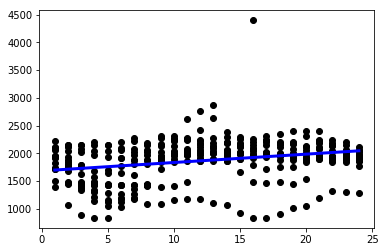

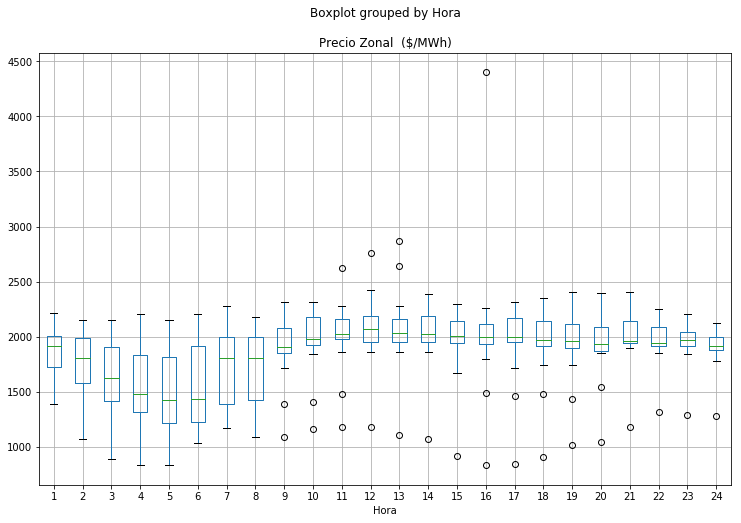

In [21]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(df_x_test, df_y_test,  color='black')
plt.plot(df_x_test, df_y_pred, color='blue', linewidth=3)
plt.show()

#graficar box plot
data = dfFiltrado
data.boxplot('Precio Zonal  ($/MWh)', by= 'Hora', figsize=(12,8))

plt.show()